In [1]:
import os
import torch

os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.1.0+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 23.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
import numpy as np
from termcolor import colored
from torch._C import dtype
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn as nn
import matplotlib.pyplot as plt
from torchsummary import summary
from torch.autograd import Variable
from keras import backend as K
import pandas as pd
import random
import json
import pickle
from itertools import islice
from numpy import load
import math
import torch_geometric
import ast
from torch_geometric.loader import DataLoader
from torch_geometric.loader import NeighborLoader
import statistics
from statistics import mean
import sys
from collections import Counter

import sys
import os, argparse
from math import *
#import HTMLParser
import re
import random
import html.parser
from operator import add
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from xml.sax.handler import ContentHandler
import xml.sax
import xml.parsers.expat

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#  https://www.cs.jhu.edu/~taochen/SoC_Conference_Ranking.html

"""labels = dict()


labels['Artificial Intelligence and Related Subjects']= ['AAAI', 'ACL', 'CVPR','EMNLP', 'ICCV', 'ICML', 'IJCAI', 'KDD', 'KR',
                                                         'NIPS', 'RSS', 'UAI', 'AI-ED', 'AID', 'AMAI', 'CAIP', 'COLING', 'CSSAC',
                                                         'CoNLL', 'DAS', 'DocEng', 'EACL', 'EAI', 'ECCV', 'EML', 'GECCO', 'IAAI',
                                                         'ICDAR', 'ICIP', 'ICNN', 'IJCNN', 'ICPR', 'ICTAI', 'NAACL', 'WACV',
                                                         'WIC', 'CSCL', 'AAI', 'ACCV', 'AI*IA', 'IEA', 'AIE', 'AIxIA', 'ANNIE',
                                                         'ANZIIS', 'ASADM', 'ASC', 'CAAI', 'CAIA', 'EPIA', 'FCKAML', 'ICADL',
                                                         'ICANN', 'ICCB', 'ICCC', 'ICGA', 'ICMS', 'ICONIP', 'ICPS', 'IEA/AIE',
                                                         'IROS', 'NLPRS', 'PACES', 'PACLIC', 'PAKDD', 'PAKDDM', 'PRICAI', 'RANLP',
                                                         'WCES', 'WCNN', 'MIC']

labels['Hardware and Architecture']= ['ASPLOS', 'DAC', 'HPCA', 'ICCAD', 'ISCA', 'MICRO', 'CASES', 'CODES+ISSS', 'DATE', 'FCCM',
                                      'FPL', 'HCS', 'ICS', 'SUPER', 'VLSI', 'ACS', 'EuroMICRO', 'ICA3PP', 'ISC']

labels['Applications and Media']= ['ACM-MM', 'I3DG', 'PECCS', 'SIGGRAPH', 'SIGIR', 'SIGMETRICS', 'WWW', 'ASS', 'CANIM', 'CGI',
                                   'EUROGRAPH', 'ICME', 'ICWE', 'JCDL', 'MASCOTS', 'MMCN', 'NOSSDAV', 'NetStore', 'PADS', 'PG',
                                   'PT', 'WSC', 'IEEE Visualization', 'VIS', 'ECDL', 'ACM-HPC', 'DS-RT', 'DSS', 'ECIR', 'ESS',
                                   'Ed-Media', 'HPCN', 'IMSA', 'MMM', 'SCSC', 'WCSS', 'GMP', 'WISE',
                                   'IEEE Intl Wshop on Dist Int Simuland Real-Time Applications']

labels['System Technology']= ['CCS', 'ICDCS', 'ICNP', 'INFOCOM', 'MOBICOM', 'MOBISYS', 'NSDI', 'PACT', 'PODC', 'RTSS', 'SIGCOMM',
                              'SOSDI', 'SOSP', 'SPAA', 'IEEE Symposium on Security and Privacy', 'ASAP', 'CC', 'CCC', 'CSFW',
                              'Euro-Par', 'IC3N', 'ICC', 'ICPP', 'IPCCC', 'IPDPS', 'LCN', 'PAM', 'SRDS', 'VMCAI', 'WCNC', 'WCW',
                              'Fast Software Encryption', 'FSE', 'Usenix Security Symposium',
                              'European Symposium on Research in Computer Security', 'ESORICS', 'CONPAR', 'GLOBECOM', 'ICCC',
                              'ICON', 'ICPADS', 'IN', 'INET', 'MPCS', 'NCC', 'NOMS', 'Softcomm', 'VAPP', 'Public Key Cryptosystems',
                              'PKC', 'Annual Workshop on Selected Areas in Cryptography', 'SAC',
                              'Australasia Conference on Information Security and Privacy', 'ACISP',
                              'Int. Conf on Inform and Comm. Security', 'ICICS', 'Workshop on Information Hiding', 'IG*MMSEC',
                              'IGMMSEC', 'Smart Card Research and Advanced Application Conference', 'CARDIS',
                              'Workshop on Security and Privacy in E-commerce', 'SPW']

labels['Programming Languages and Software Engineering']= ['CAV', 'FM/FME', 'FSE', 'ICFP', 'ICSE', 'OOPSLA', 'PLDI', 'POPL',
                                                           'APLAS', 'ASE', 'CAiSE', 'CP', 'ECOOP', 'ESOP', 'FOSSACS', 'GCSE',
                                                           'HASKELL', 'ICCL', 'ICECCS', 'ICSM', 'ICSR', 'ISRE', 'MPC', 'PADL',
                                                           'PEPM', 'PPDP', 'RTA', 'SAS', 'SEKE', 'TACAS', 'WCRE',
                                                           'IEEE Intl Conf on Formal Engineering Methods', 'ICFEM',
                                                           'Intl Conf on Integrated Formal Methods', 'iFM', 'ALP', 'APSEC',
                                                           'COMPSAC', 'FASE', 'ICCC', 'LOPSTR', 'PAP/PACT', 'PAP', 'PACT', 'PLILP',
                                                           'TAPSOFT', 'UML', 'Intl Conf of Z Users', 'Z User Group', 'ZUG',
                                                           'IFIP', 'FORTE']

labels['Algorithms and Theory']= ['COLT', 'CRYPTO', 'EUROCRYPT', 'FOCS', 'LICS', 'SCG', 'SODA', 'STOC', 'ALT', 'CADE', 'CC',
                                  'CONCUR', 'DSIC', 'ESA', 'EUROCOLT', 'EUROCRYPT', 'FST&TCS', 'FST', 'TCS', 'ICALP', 'IEEEIT',
                                  'IPCO', 'ISAAC', 'ISTCS', 'LATIN', 'LFCS', 'MFCS', 'STACS', 'SWAT', 'WADS', 'AAAAECC', 'ALEX',
                                  'ALG', 'ASIAN', 'AWTI', 'CATS', 'CCCG', 'COCOON', 'CSL', 'DMTCS', 'EWLR', 'FCT', 'FTP', 'GD',
                                  'ICCI', 'JCDCG', 'LPMA', 'MCU', 'MEGA', 'SIROCCO', 'UMC', 'WG']

labels['Data Bases']= ['ICDE', 'PODS', 'SIGMOD', 'VLDB', 'CIKM', 'CoopIS', 'DASFAA', 'DEXA', 'DOOD', 'EDBT', 'ER', 'FODO', 'SSD',
                       'SSDBM', 'ADBIS', 'ADC', 'ADTI', 'BNCOD', 'COMAD', 'DaWaK', 'FEWFDB', 'ICDM', 'IDEAS', 'IFIP-DBSEC',
                       'IFIP-DS', 'MDM', 'NGDB', 'VDB', 'RIDE Workshop']

labels['BioMedical']= ['ISMB', 'RECOMB', 'AMIA', 'CSB', 'CSB', 'DNA', 'MEDINFO', 'WABI', 'APAMI', 'BIBE', 'CITB', 'DILS', 'ECAIM',
                       'GIW', 'INBS', 'International Conference on Sequences and their Applications', 'SETA']"""

labels = dict()


labels['Artificial Intelligence and Related Subjects']= ['ICML', 'NIPS', 'RSS', 'UAI']

labels['Hardware and Architecture']= ['ASPLOS', 'DAC', 'HPCA', 'ICCAD', 'ISCA', 'MICRO']

labels['Applications and Media']= ['ACM-MM', 'I3DG', 'PECCS', 'SIGGRAPH', 'SIGIR']

labels['System Technology']= ['CCS', 'ICDCS', 'ICNP', 'INFOCOM']

labels['Programming Languages and Software Engineering']= ['CAV', 'FM/FME', 'FSE', 'ICFP', 'ICSE', 'OOPSLA', 'PLDI', 'POPL',
                                                           'APLAS', 'ASE']

labels['Algorithms and Theory']= ['COLT', 'CRYPTO', 'EUROCRYPT', 'FOCS', 'LICS', 'SCG', 'SODA', 'STOC']

labels['Data Bases']= ['ICDE', 'PODS', 'SIGMOD', 'VLDB', 'CIKM']

labels['BioMedical']= ['ISMB', 'RECOMB', 'AMIA', 'CSB', 'CSB', 'DNA', 'MEDINFO', 'WABI', 'APAMI', 'BIBE', 'CITB', 'DILS', 'ECAIM',
                       'GIW', 'INBS', 'International Conference on Sequences and their Applications', 'SETA']
all_confs_in_one_list = []
for val in labels.values():
    all_confs_in_one_list.extend(val)

confs_2_category = dict()
for key, val in labels.items():
    for conf in val:
        confs_2_category[conf] = key



In [5]:
conf_number_of_publications = dict()
for conf in all_confs_in_one_list:
    conf_number_of_publications[conf] = 0

In [9]:
one_paper_parsed = dict()
field_2_tokens = dict()
for key in labels.keys():
    field_2_tokens[key] = []
import xml.sax
class DBLP_Handler( xml.sax.ContentHandler ):
    def __init__(self):
        self.CurrentData = ""
        self.booktitle = ""
        self.co_author_list_one_paper = []
        self.year = ""
        self.title = ""

        self.engaged_in = False

        #self.one_paper_parsed = dict()
        self.paper_id = 0
        self.useless_words = ['curve25519', 'nizk', '2014', '$\\\\mu$', 'w', 'm6', '2006', '2200', '1', 'chi@20', '00',
                              '2020', '2016', "title", "'\nb'", '-', '0', '\nb', 'com', "'", "\nb'", '', 'i', 'me', 'my', 'myself',
                              'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
                              'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
                              'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
                              'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
                              'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
                              'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
                              'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
                              'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
                              'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
                              'some', 'such', 'no', 'nor', 'not', 'only', 'study', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
                              'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've',
                              'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                              "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                              "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
                              "weren't", 'won', "won't", 'wouldn', "wouldn't", '1996', 'sw26010', 'oz', 'top-', 'one', 'two',
                              'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', '11th', 'rumor', '1st', '2nd',
                              '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th',
                              'via', 'based', 'using', 'possible?', 'cases', 'channel', 'corners', 'live', 'channel', 'intended',
                              'app', 'effect', 'costly', 'art?', 'shaping', 'shape', 'use', 'structure', 'fast', 'orange',
                              'winning', 'mixture', 'identifying', 'object', 'implementation', 'checking', 'feature', 'search',
                              'strategy', 'positioning', 'knowledge', 'scene', 'feature', 'extended', 'detection', 'sensor',
                              'applications', 'stable', 'order', 'classified', 'finding', 'log', 'jumps', 'proofs', 'improve',
                              'control', 'system', 'systems', "writer's", 'goal', 'awareness', 'improving', 'approach', 'data',
                              'model', 'models', 'genetic', 'translation''translation', 'domain','reconstruction', 'neural', 'low',
                              'methodology', 'modeling', 'retrieval', 'information','semantic', 'online', 'recognition', 'content',
                              'text', 'multimedia', 'event', 'analysis', 'efficient', 'algorithm', 'allocation', 'scheme',
                              'learning', 'management', 'engineering', 'development','testing', 'tool', 'test', 'case',
                              'generation', 'requirements', 'automatic', 'support', 'constraint', 'algorithms', 'problem',
                              'problems', 'abstract', 'improved', 'languages', 'large', 'processing', 'recommendation', 'prediction',
                              'similarity', 'electronic', 'decision', 'record', 'research', 'informatics', 'records', 'automated',
                              'sequence', 'word', 'adaptation', 'level', 'reduction', 'technique', 'social', 'integration',
                              'color', 'human', 'manufacturing', 'types', 'type', 'specifications', 'specification', 'functions',
                              'minimum', 'bounded', 'series', 'discrete', 'library', 'extraction'
                              ]


    # Call when an element starts
    def startElement(self, tag, attributes):
        self.CurrentData = tag
        if tag == "inproceedings":#or tag == "journal":
            self.engaged_in = True

    # Call when an elements ends
    def endElement(self, tag):
        if tag == "inproceedings":# or tag == "journal":
            self.gather_one_paper_info()
            self.reset_all_parameters()
        self.CurrentData = ""

    # Call when a character is read
    def characters(self, content):
        if self.CurrentData == "booktitle" and self.engaged_in == True:
            self.booktitle = content
        elif self.CurrentData == "author" and self.engaged_in == True:
            self.author = content
            self.co_author_list_one_paper.append(self.author)
        elif self.CurrentData == "year" and self.engaged_in == True:
            self.year = content
        elif self.CurrentData == "title" and self.engaged_in == True:
            self.title = content

    def take_those_only_from_conf_list(self, book_title_for_conf):
        global conf_number_of_publications
        pattern = re.compile("\.|/|,|:|;|\ |’|\[|\]|\{|\}|\(|\)|\<|\>|\"|\'\n\t\r")
        conf_tokens = pattern.split(book_title_for_conf)
        checking = 0
        for token in conf_tokens:
            if token in all_confs_in_one_list:
                checking += 1
                self.associated_category = confs_2_category[token]
                conf_number_of_publications[token] += 1
            else:
                checking += 0
        if checking>0:
            return True
        else:
            return False
    def title_tokens(self, title):
        pattern = re.compile("\.|/|,|:|;|\ |\[|\]|\{|\}|\(|\)|\<|\>|\"|\'\n\t\r")
        tokens = pattern.split(title)
        tokens = [x.lower() for x in tokens]
        tokens = [str(x) for x in tokens if x not in self.useless_words]
        return tokens

    def gather_one_paper_info(self):
        global field_2_tokens
        if self.title != '' and self.year != '' and len(self.co_author_list_one_paper) != 0 and self.booktitle != '' and self.take_those_only_from_conf_list(self.booktitle):
            one_paper_parsed[str(self.paper_id)] = dict()
            one_paper_parsed[str(self.paper_id)]['title'] = self.title_tokens(self.title)#self.title
            one_paper_parsed[str(self.paper_id)]['year'] = self.year
            one_paper_parsed[str(self.paper_id)]['authors'] = self.co_author_list_one_paper
            one_paper_parsed[str(self.paper_id)]['booktitle'] = self.booktitle
            one_paper_parsed[str(self.paper_id)]['publication_category'] = self.associated_category
            field_2_tokens[self.associated_category].extend(self.title_tokens(self.title))

    def reset_all_parameters(self):
        self.title = ''
        self.year = ''
        self.co_author_list_one_paper = []
        self.booktitle = ''
        self.paper_id = self.paper_id + 1
        self.engaged_in = False


if ( __name__ == "__main__"):

   # create an XMLReader
   parser = xml.sax.make_parser()

   # turn off namepsaces
   parser.setFeature(xml.sax.handler.feature_namespaces, 0)

   # override the default ContextHandler
   Handler = DBLP_Handler()
   parser.setContentHandler( Handler )

   parser.parse("/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/dblp.xml")

## **Number of Publications for each Conf**

In [10]:
for key, value in conf_number_of_publications.items():
    print(key, "     ", value)

ICML       10623
NIPS       7275
RSS       0
UAI       3298
ASPLOS       1257
DAC       8001
HPCA       1422
ICCAD       4929
ISCA       2325
MICRO       1915
ACM-MM       0
I3DG       0
PECCS       359
SIGGRAPH       14848
SIGIR       6254
CCS       2844
ICDCS       5341
ICNP       1453
INFOCOM       10999
CAV       1884
FM/FME       0
FSE       3136
ICFP       693
ICSE       6981
OOPSLA       2749
PLDI       1531
POPL       1523
APLAS       567
ASE       2641
COLT       2197
CRYPTO       2143
EUROCRYPT       1905
FOCS       3389
LICS       1974
SCG       1411
SODA       4285
STOC       3947
ICDE       6781
PODS       1451
SIGMOD       4757
VLDB       2577
CIKM       7322
ISMB       746
RECOMB       1032
AMIA       11543
CSB       536
DNA       510
MEDINFO       0
WABI       676
APAMI       0
BIBE       2317
CITB       0
DILS       240
ECAIM       0
GIW       0
INBS       0
International Conference on Sequences and their Applications       0
SETA       278


In [11]:
conf_number_of_publications_by_category = dict()
for key, values in labels.items():
    conf_number_of_publications_by_category[key] = dict()
    for conf in values:
        conf_number_of_publications_by_category[key][conf] = conf_number_of_publications[conf]

In [12]:
for key, values in conf_number_of_publications_by_category.items():
    print(key,": ")
    for key2, value2 in values.items():
        print("     ",key2," : ", value2)
    print("--------------------------------------------------")

Artificial Intelligence and Related Subjects : 
      ICML  :  10623
      NIPS  :  7275
      RSS  :  0
      UAI  :  3298
--------------------------------------------------
Hardware and Architecture : 
      ASPLOS  :  1257
      DAC  :  8001
      HPCA  :  1422
      ICCAD  :  4929
      ISCA  :  2325
      MICRO  :  1915
--------------------------------------------------
Applications and Media : 
      ACM-MM  :  0
      I3DG  :  0
      PECCS  :  359
      SIGGRAPH  :  14848
      SIGIR  :  6254
--------------------------------------------------
System Technology : 
      CCS  :  2844
      ICDCS  :  5341
      ICNP  :  1453
      INFOCOM  :  10999
--------------------------------------------------
Programming Languages and Software Engineering : 
      CAV  :  1884
      FM/FME  :  0
      FSE  :  3136
      ICFP  :  693
      ICSE  :  6981
      OOPSLA  :  2749
      PLDI  :  1531
      POPL  :  1523
      APLAS  :  567
      ASE  :  2641
----------------------------------------

In [13]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "conf_number_of_publications.npy", conf_number_of_publications)

pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "conf_number_of_publications_by_category.npy", conf_number_of_publications_by_category)

In [14]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
conf_number_of_publications = np.load(pathname + "conf_number_of_publications.npy", allow_pickle=True).item()

In [15]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
conf_number_of_publications_by_category = np.load(pathname + "conf_number_of_publications_by_category.npy", allow_pickle=True).item()

In [16]:
print(list(one_paper_parsed.items())[:100])

[('82', {'title': ['committee-based'], 'year': '2010', 'authors': ['Ernest Mwebaze', 'John A. Quinn'], 'booktitle': 'NIPS Causality: Objectives and Assessment', 'publication_category': 'Artificial Intelligence and Related Subjects'}), ('89', {'title': ['differentially', 'private'], 'year': '2012', 'authors': ['Prateek Jain 0002', 'Pravesh Kothari', 'Abhradeep Thakurta'], 'booktitle': 'COLT', 'publication_category': 'Algorithms and Theory'}), ('104', {'title': ['bernoulli', 'hypercube', 'extracting', 'boolean', 'rules'], 'year': '2010', 'authors': ['Mehreen Saeed'], 'booktitle': 'NIPS Causality: Objectives and Assessment', 'publication_category': 'Artificial Intelligence and Related Subjects'}), ('107', {'title': ['causality', 'challenge', 'benchmarking', 'relevant', 'signal', 'components', 'effective', 'monitoring', 'process'], 'year': '2010', 'authors': ['Michael McCann', 'Yuhua Li 0001', 'Liam P. Maguire', 'Adrian Johnston'], 'booktitle': 'NIPS Causality: Objectives and Assessment', 

In [17]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "paperID_2_title_authorslist_year_booktitle.npy", one_paper_parsed)

In [18]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
parsed_dict = np.load(pathname + "paperID_2_title_authorslist_year_booktitle.npy", allow_pickle=True).item()

In [19]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "field_2_tokens.npy", field_2_tokens)

In [20]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
field_2_tokens = np.load(pathname + "field_2_tokens.npy", allow_pickle=True).item()

In [21]:
for key, values in conf_number_of_publications_by_category.items():
    sum = 0
    for key2, values2 in values.items():
        sum += values2
    print(key, ": has ", sum, " publications")

Artificial Intelligence and Related Subjects : has  21196  publications
Hardware and Architecture : has  19849  publications
Applications and Media : has  21461  publications
System Technology : has  20637  publications
Programming Languages and Software Engineering : has  21705  publications
Algorithms and Theory : has  21251  publications
Data Bases : has  22888  publications
BioMedical : has  17878  publications


## **authors_name_2_id**

In [22]:
id_counter_for_authors = 0
authors_name_2_id = dict()
def create_unique_id_for_authors(main_parsed_dict):
    global authors_name_2_id
    global id_counter_for_authors
    for key, value in main_parsed_dict.items():
        for author in value['authors']:
            if author not in authors_name_2_id.keys():
                authors_name_2_id[author] = id_counter_for_authors
                id_counter_for_authors = id_counter_for_authors + 1

In [23]:
create_unique_id_for_authors(parsed_dict)

In [24]:
i=0
for key, value in authors_name_2_id.items():
    print("key: ", key, " value: ", value)
    i+=1
    if i == 20:
        break

key:  Ernest Mwebaze  value:  0
key:  John A. Quinn  value:  1
key:  Prateek Jain 0002  value:  2
key:  Pravesh Kothari  value:  3
key:  Abhradeep Thakurta  value:  4
key:  Mehreen Saeed  value:  5
key:  Michael McCann  value:  6
key:  Yuhua Li 0001  value:  7
key:  Liam P. Maguire  value:  8
key:  Adrian Johnston  value:  9
key:  Ping Li 0001  value:  10
key:  Cun-Hui Zhang  value:  11
key:  Elad Hazan  value:  12
key:  Satyen Kale  value:  13
key:  Shie Mannor  value:  14
key:  Vianney Perchet  value:  15
key:  Gilles Stoltz  value:  16
key:  Alexander Rakhlin  value:  17
key:  Karthik Sridharan  value:  18
key:  Ambuj Tewari  value:  19


In [25]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "authors_name_2_ID.npy", authors_name_2_id)

## **parsed_dict by author ID not name**.   only converts

In [26]:
parsed_dict_by_author_id = dict()
def create_parsed_dict_by_author_id(main_parsed_dict, authors_name_2_id):
    global parsed_dict_by_author_id
    for paper_id, values in main_parsed_dict.items():
        parsed_dict_by_author_id[paper_id] = dict()
        parsed_dict_by_author_id[paper_id]['title'] = values['title']
        parsed_dict_by_author_id[paper_id]['year'] = values['year']
        parsed_dict_by_author_id[paper_id]['booktitle'] = values['booktitle']
        parsed_dict_by_author_id[paper_id]['publication_category'] = values['publication_category']
        ids = []
        for author in values['authors']:
            ids.append(authors_name_2_id[author])
        parsed_dict_by_author_id[paper_id]['authors'] = ids

In [27]:
create_parsed_dict_by_author_id(parsed_dict, authors_name_2_id)

In [28]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "paperID_2_title_authorslistID_year_booktitle.npy", parsed_dict_by_author_id)

In [5]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
parsed_dict_by_author_id = np.load(pathname + "paperID_2_title_authorslistID_year_booktitle.npy", allow_pickle=True).item()

In [6]:
i=0
for key, value in parsed_dict_by_author_id.items():
    print("key: ", key, " value: ", value)
    i+=1
    if i == 10:
        break

key:  1  value:  {'title': ['steps', 'rendezvous', 'casual', 'user'], 'year': '1974', 'booktitle': 'IFIP Working Conference Data Base Management', 'publication_category': 'Programming Languages and Software Engineering', 'authors': [0]}
key:  82  value:  {'title': ['committee-based'], 'year': '2010', 'booktitle': 'NIPS Causality: Objectives and Assessment', 'publication_category': 'Artificial Intelligence and Related Subjects', 'authors': [1, 2]}
key:  89  value:  {'title': ['differentially', 'private'], 'year': '2012', 'booktitle': 'COLT', 'publication_category': 'Algorithms and Theory', 'authors': [3, 4, 5]}
key:  104  value:  {'title': ['bernoulli', 'hypercube', 'extracting', 'boolean', 'rules'], 'year': '2010', 'booktitle': 'NIPS Causality: Objectives and Assessment', 'publication_category': 'Artificial Intelligence and Related Subjects', 'authors': [6]}
key:  107  value:  {'title': ['causality', 'challenge', 'benchmarking', 'relevant', 'signal', 'components', 'effective', 'monitor

In [ ]:
"""field_2_tokens_sorted = dict()
def order_keywords(field_2_tokens_replica):
    global field_2_tokens_sorted
    for field, keywords in field_2_tokens_replica.items():
        result = [item for items, c in Counter(keywords).most_common(10)
                                for item in [items] * c]
        result = list(dict.fromkeys(result))
        field_2_tokens_sorted[field] = result"""

In [ ]:
d1 = {'a':1, 'b':2, 'c':3}
d2 = {'x':4, 'c':7,'d':5}
d3 = {'b':5, 'c':8,'e':6}
dicts = [d1,d2,d3]
common_keys = set(d1.keys())
for d in dicts[1:]:
    common_keys.intersection_update(set(d.keys()))
print(common_keys)

{'c'}


In [ ]:
d1 = {'a':1, 'b':2, 'c':3}
d2 = {'x':4, 'c':7,'d':5}
d3 = {'b':5, 'c':8,'e':6}
print(d1['b'])

2


## **find the most repeated keywords of each field**

In [31]:
field_2_tokens_sorted = dict()
field_2_keywords_dict_2_counts = dict()
def order_keywords(field_2_tokens_replica, upper_bound):
    global field_2_tokens_sorted
    global field_2_keywords_dict_2_counts
    for field, keywords in field_2_tokens_replica.items():

        keywords_2_counts = Counter(keywords).most_common(upper_bound)

        field_2_keywords_dict_2_counts[field] = {item:c for (item, c) in keywords_2_counts}

        keywords_2_counts = [item for (item, c) in keywords_2_counts]
        result_keywords_2_set_sorted = list(dict.fromkeys(keywords_2_counts))
        field_2_tokens_sorted[field] = result_keywords_2_set_sorted



In [32]:
order_keywords(field_2_tokens, upper_bound=100)

In [33]:
i=0
for key, value in field_2_keywords_dict_2_counts.items():
    print("key: ", key, " value: ", value)
    i+=1
    if i == 10:
        break

key:  Artificial Intelligence and Related Subjects  value:  {'networks': 1664, 'bayesian': 1004, 'optimization': 837, 'reinforcement': 822, 'inference': 804, 'deep': 757, 'stochastic': 643, 'network': 547, 'linear': 536, 'estimation': 529, 'classification': 517, 'sparse': 502, 'probabilistic': 488, 'gaussian': 475, 'gradient': 475, 'clustering': 460, 'optimal': 439, 'robust': 429, 'graph': 421, 'kernel': 410, 'regression': 408, 'processes': 402, 'markov': 397, 'training': 396, 'adaptive': 376, 'variational': 375, 'causal': 358, 'selection': 347, 'sampling': 347, 'adversarial': 330, 'latent': 319, 'methods': 317, 'process': 314, 'random': 309, 'bounds': 308, 'policy': 303, 'time': 297, 'dynamic': 296, 'generative': 288, 'representations': 286, 'bandits': 285, 'hierarchical': 279, 'generalization': 278, 'approximation': 277, 'matrix': 270, 'structured': 266, 'method': 260, 'convergence': 257, 'graphs': 255, 'active': 252, 'framework': 250, 'multiple': 249, 'convex': 247, 'local': 241, 'd

In [34]:
def without_keys(input_dict, banned_keys):
    new_dict = dict()
    for key, values in input_dict.items():
        if key not in banned_keys:
            new_dict[key] = values
    return new_dict

def drop_common_keywords_by_highest_frq_takes_it_policy():
    global field_2_tokens_sorted
    all_keywords = []
    for field, keywords in field_2_tokens_sorted.items():
        new_field_2_tokens_sorted = without_keys(field_2_tokens_sorted, field)

        for keyword in list(keywords):
            max_dict = dict()
            for field2, keywords2 in new_field_2_tokens_sorted.items():
                if keyword in list(keywords2):
                    max_dict[field2] = field_2_keywords_dict_2_counts[field2][keyword]


            if len(list(max_dict.keys())) > 0:
                max_dict_inverse = {v: k for k, v in max_dict.items()}
                maximum_value = max(list(max_dict_inverse.keys()))
                key_of_max = max_dict_inverse[maximum_value]
                for field3, values3 in field_2_tokens_sorted.items():
                    if (field3 != key_of_max) and (keyword in field_2_tokens_sorted[field3]):
                        field_2_tokens_sorted[field3].remove(keyword)

In [35]:
drop_common_keywords_by_highest_frq_takes_it_policy()

In [ ]:
x=['learning', 'networks', 'neural', 'neural', 'bayesian', 'optimization', 'reinforcement']
y = Counter(x)
#print(y)


In [36]:
for key, value in field_2_tokens_sorted.items():
    print(key, "    ", len(value), "    ", value)

Artificial Intelligence and Related Subjects      41      ['bayesian', 'reinforcement', 'gaussian', 'gradient', 'kernel', 'regression', 'markov', 'training', 'variational', 'causal', 'adversarial', 'latent', 'policy', 'generative', 'representations', 'bandits', 'generalization', 'convergence', 'active', 'descent', 'function', 'unsupervised', 'belief', 'graphical', 'conditional', 'regularization', 'dynamics', 'uncertainty', 'features', 'vector', 'recurrent', 'generalized', 'kernels', 'spectral', 'nonparametric', 'propagation', 'machines', 'noise', 'boosting', 'semi-supervised', 'distributions']
Hardware and Architecture      44      ['optimization', 'hardware', 'cache', 'circuit', 'timing', 'processors', 'processor', 'embedded', 'vlsi', 'layout', 'architectures', 'analog', 'deep', 'machine', 'instruction', 'accelerator', 'estimation', 'statistical', 'on-chip', 'partitioning', 'designs', 'hierarchical', 'cad', 'exploiting', 'sequential', 'path', 'clock', 'voltage', 'interconnect', 'globa

In [37]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "field_2_tokens_sorted.npy", field_2_tokens_sorted)

In [38]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
field_2_tokens_sorted = np.load(pathname + "field_2_tokens_sorted.npy", allow_pickle=True).item()

In [39]:
def limit_node_features(limit):
    global field_2_tokens_sorted
    for f, toks in field_2_tokens_sorted.items():
        result = [item for items, c in Counter(toks).most_common()
                                      for item in [items] * c]
        result = list(dict.fromkeys(result))
        field_2_tokens_sorted[f] = result[:limit]

In [40]:
node_feature_limit = 20
limit_node_features(node_feature_limit)

In [41]:
for key, value in field_2_tokens_sorted.items():
    print(key, "    ", value)

Artificial Intelligence and Related Subjects      ['bayesian', 'reinforcement', 'gaussian', 'gradient', 'kernel', 'regression', 'markov', 'training', 'variational', 'causal', 'adversarial', 'latent', 'policy', 'generative', 'representations', 'bandits', 'generalization', 'convergence', 'active', 'descent']
Hardware and Architecture      ['optimization', 'hardware', 'cache', 'circuit', 'timing', 'processors', 'processor', 'embedded', 'vlsi', 'layout', 'architectures', 'analog', 'deep', 'machine', 'instruction', 'accelerator', 'estimation', 'statistical', 'on-chip', 'partitioning']
Applications and Media      ['3d', 'graphics', 'rendering', 'animation', 'reality', 'computer', 'image', 'real-time', 'display', 'motion', 'simulation', 'digital', 'interface', 'visual', 'relevance', 'art', 'feedback', 'augmented', 'light', 'space']
System Technology      ['networks', 'wireless', 'network', 'distributed', 'mobile', 'routing', 'performance', 'scheduling', 'traffic', 'protocol', 'dynamic', 'comm

## **Edges Dict for Count**

In [7]:
edges_source_target_count = dict()
def create_edge_counter(parsed_dict_by_author_id_replica):
    global edges_source_target_count
    for paper_id, paper_info in parsed_dict_by_author_id_replica.items():
        for author1 in paper_info['authors']:
            for author2 in paper_info['authors']:
                if author1 == author2:
                    continue
                if author1 < author2:
                    try:
                        edges_source_target_count[(author1, author2)] += 1.0
                    except:
                        edges_source_target_count[(author1, author2)] = 1.0

In [8]:
create_edge_counter(parsed_dict_by_author_id)

In [9]:
i=0
for key, value in edges_source_target_count.items():
    print("key: ", key, " value: ", value)
    i+=1
    if i == 10:
        break

key:  (1, 2)  value:  3.0
key:  (3, 4)  value:  2.0
key:  (3, 5)  value:  5.0
key:  (4, 5)  value:  1.0
key:  (7, 8)  value:  1.0
key:  (7, 9)  value:  1.0
key:  (7, 10)  value:  1.0
key:  (8, 9)  value:  6.0
key:  (8, 10)  value:  1.0
key:  (9, 10)  value:  1.0


## **Edges Dict for Probability**

In [10]:
edges_source_target_prob = dict()
def create_edge_probability(edges_source_target_count_reolica):
    global edges_source_target_prob
    for key, value in edges_source_target_count.items():
        edges_source_target_prob[key] = 1-math.exp(-value/2)

In [11]:
create_edge_probability(edges_source_target_count)

In [12]:
i=0
for key, value in edges_source_target_prob.items():
    print("key: ", key, " value: ", value)
    i+=1
    if i == 10:
        break

key:  (1, 2)  value:  0.7768698398515702
key:  (3, 4)  value:  0.6321205588285577
key:  (3, 5)  value:  0.9179150013761012
key:  (4, 5)  value:  0.3934693402873666
key:  (7, 8)  value:  0.3934693402873666
key:  (7, 9)  value:  0.3934693402873666
key:  (7, 10)  value:  0.3934693402873666
key:  (8, 9)  value:  0.950212931632136
key:  (8, 10)  value:  0.3934693402873666
key:  (9, 10)  value:  0.3934693402873666


In [13]:
torch.save(edges_source_target_prob, '/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/edges_source_target_prob.pt')

In [11]:
print(max(edges_source_target_prob.values()))

1.0


In [12]:
probs = []
for key, value in edges_source_target_prob.items():
    probs.append(value)

In [13]:
print(len(probs))

3301970


In [50]:
import statistics

In [51]:
i = 0
for p in probs:
    print(p)
    if i == 10:
        break
    i+=1

0.3934693402873666
0.6321205588285577
0.9179150013761012
0.3934693402873666
0.3934693402873666
0.3934693402873666
0.3934693402873666
0.3934693402873666
0.3934693402873666
0.3934693402873666
0.8646647167633873


In [14]:
mean = statistics.mean(probs)
std = statistics.pstdev(probs)

In [15]:
print("mean: ", mean)
print("std: ", std)

mean:  0.462155769530485
std:  0.14560037677889126


## **Store Edges Probability**

In [54]:
pathname = '/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/'
edge_prob_file = open(pathname + "source_target_prob_file.txt", "w")
for key, val in edges_source_target_prob.items():
    a1, a2 = key
    #print(a1, a2, edge_frequency[key]['probability'])
    edge_prob_file.write(str(a1) + " " + str(a2) + " " + str(edges_source_target_prob[key]) + "\n")
edge_prob_file.close()

## **authors ID set**

In [16]:
authors_id_set = set()
def create_authors_set(parsed_dict_by_author_id_replica):
    global authors_id_set
    for key, val in parsed_dict_by_author_id_replica.items():
        for author in val['authors']:
            authors_id_set.add(author)

In [17]:
create_authors_set(parsed_dict_by_author_id)

In [18]:
print(len(authors_id_set))

632870


## **Authors adjacency list**

In [ ]:
#authors_adj_list = dict()
#def create_adj_list_for_authors(parsed_dict_by_author_id_replica):
#    global authors_adj_list
#    for paper_id, the_paper_attributes in parsed_dict_by_author_id_replica.items():
#        group = the_paper_attributes['authors']
#        boss = min(group)
#        #excluded = the_paper_attributes['authors'].remove(boss)
#        if boss in authors_adj_list.keys():
#            authors_adj_list[boss].extend(group)
#        else:
#            authors_adj_list[boss] = group
#    for author, co_authors in authors_adj_list.items():
#        authors_adj_list[author] = list(dict.fromkeys(co_authors))


In [ ]:
#create_adj_list_for_authors(parsed_dict_by_author_id)

In [ ]:
#print(len(authors_adj_list.keys()), len(authors_id_set))

84872 374288


In [ ]:
#i=0
#for key, value in authors_adj_list.items():
#    print("key: ", key, " value: ", value)
#    i+=1
#    if i == 10:
#        break

key:  0  value:  [0, 1, 184250, 195679, 64055, 257508, 269447, 269448, 269449, 269450, 269451, 269452, 269453, 275333, 275334, 275335]
key:  2  value:  [2]
key:  3  value:  [3, 4, 5, 6]
key:  7  value:  [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 258, 49519, 3624, 50747, 51357, 57780, 48297, 168254, 125, 124, 318575, 136471, 37027, 5488, 26752, 47648, 355923, 355924, 135478, 9187, 51515, 51516, 167409]
key:  19  value:  [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
key:  44  value:  [44, 45, 46, 47, 53, 54, 56, 57, 71, 72, 73, 74, 217, 218, 14298, 310, 14299, 142163, 3592, 142164, 23654, 142165, 142166, 142167, 142168, 403, 12203, 142169, 134, 142170, 141991, 174, 28398, 147650, 489, 24843, 147651, 135705, 148022, 148023, 148024, 148025, 148026, 136364, 148942, 148943, 7577, 148944, 148945, 148946, 13766, 153273, 153274, 146570, 139654, 155147, 155148, 26699, 24707, 11694, 27623, 2772, 32553, 166, 138236, 8093, 271935, 170269, 11

In [57]:
authors_adj_list = dict()
def create_adj_list_for_authors(parsed_dict_by_author_id_replica):
    global authors_adj_list
    for paper_id, the_paper_attributes in parsed_dict_by_author_id_replica.items():
        group = the_paper_attributes['authors']
        for author in group:
            if author in authors_adj_list.keys():
                authors_adj_list[author].extend(group)
                authors_adj_list[author] = list(dict.fromkeys(list(authors_adj_list[author])))
            else:
                authors_adj_list[author] = group
                authors_adj_list[author] = list(dict.fromkeys(list(authors_adj_list[author])))



In [58]:
create_adj_list_for_authors(parsed_dict_by_author_id)

In [59]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "authors_adj_list.npy", authors_adj_list)

In [60]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
authors_adj_list = np.load(pathname + "authors_adj_list.npy", allow_pickle=True).item()

## **Author Publication Histogram**

In [61]:
author_id_2_pulication_history = dict()
def create_author_id_2_publication_histogram(parsed_dict_by_author_id_replica):
    global author_id_2_pulication_history
    for paper, values in parsed_dict_by_author_id.items():
        for author in values['authors']:
            if author not in author_id_2_pulication_history.keys():
                author_id_2_pulication_history[author] = dict()
                author_id_2_pulication_history[author][values['publication_category']] = 1
            else:
                if values['publication_category'] in author_id_2_pulication_history[author].keys():
                    author_id_2_pulication_history[author][values['publication_category']] += 1
                else:
                    author_id_2_pulication_history[author][values['publication_category']] = 1

In [62]:
create_author_id_2_publication_histogram(parsed_dict_by_author_id)

In [63]:
i=0
for id, info in author_id_2_pulication_history.items():
    print(id, info)
    i+=1
    if i ==100:
        break

0 {'Artificial Intelligence and Related Subjects': 1}
1 {'Artificial Intelligence and Related Subjects': 2}
2 {'Algorithms and Theory': 14, 'Programming Languages and Software Engineering': 1, 'Artificial Intelligence and Related Subjects': 49}
3 {'Algorithms and Theory': 12, 'Artificial Intelligence and Related Subjects': 1, 'Hardware and Architecture': 1}
4 {'Algorithms and Theory': 12, 'Artificial Intelligence and Related Subjects': 7, 'Data Bases': 1}
5 {'Artificial Intelligence and Related Subjects': 1}
6 {'Artificial Intelligence and Related Subjects': 1}
7 {'Artificial Intelligence and Related Subjects': 1}
8 {'Artificial Intelligence and Related Subjects': 1}
9 {'Artificial Intelligence and Related Subjects': 1}
10 {'Algorithms and Theory': 8, 'Data Bases': 25, 'Artificial Intelligence and Related Subjects': 54, 'Applications and Media': 10}
11 {'Algorithms and Theory': 2, 'Artificial Intelligence and Related Subjects': 4}
12 {'Algorithms and Theory': 34, 'BioMedical': 1, 'Arti

## **Author label**

In [64]:
author_2_label = dict()
def create_author_2_label_dedication(author_id_2_pulication_history_replica):
    for id, history in author_id_2_pulication_history_replica.items():
        author_2_label[id] = list(history.keys())[list(history.values()).index(max(history.values()))]

In [65]:
create_author_2_label_dedication(author_id_2_pulication_history)

In [66]:
i = 0
for id, values in author_2_label.items():
    print(id, values)
    if id==10:
        break

0 Artificial Intelligence and Related Subjects
1 Artificial Intelligence and Related Subjects
2 Artificial Intelligence and Related Subjects
3 Algorithms and Theory
4 Algorithms and Theory
5 Artificial Intelligence and Related Subjects
6 Artificial Intelligence and Related Subjects
7 Artificial Intelligence and Related Subjects
8 Artificial Intelligence and Related Subjects
9 Artificial Intelligence and Related Subjects
10 Artificial Intelligence and Related Subjects


## **author keywords by field keywords**

In [67]:
authorID_keywords_label = dict()
def create_author_profile(parsed_dict_by_author_id_replica):
    global authorID_keywords_label
    for key, values in parsed_dict_by_author_id_replica.items():
        for author in values['authors']:
            try:
                authorID_keywords_label[author]['keywords'].extend(values['title'])
                authorID_keywords_label[author]['keywords'] = list(dict.fromkeys(authorID_keywords_label[key]['keywords']))
            except:
                authorID_keywords_label[author] = dict()
                authorID_keywords_label[author]['keywords'] = list(dict.fromkeys(values['title']))
                authorID_keywords_label[author]['label_category'] = author_2_label[author]


In [68]:
create_author_profile(parsed_dict_by_author_id)


In [69]:
i=0
for key, value in authorID_keywords_label.items():
    print("key: ", key, " value: ", value)
    i+=1
    if i == 10:
        break

key:  0  value:  {'keywords': ['committee-based'], 'label_category': 'Artificial Intelligence and Related Subjects'}
key:  1  value:  {'keywords': ['factorial', 'switching', 'kalman', 'filters', 'condition', 'monitoring', 'neonatal', 'intensive', 'care'], 'label_category': 'Artificial Intelligence and Related Subjects'}
key:  2  value:  {'keywords': ['recovery', 'guarantees', 'one-hidden-layer', 'networks'], 'label_category': 'Artificial Intelligence and Related Subjects'}
key:  3  value:  {'keywords': ['randomized', 'scheduler', 'probabilistic', 'guarantees', 'bugs'], 'label_category': 'Algorithms and Theory'}
key:  4  value:  {'keywords': ['differentially', 'private', 'matrix', 'completion', 'revisited'], 'label_category': 'Algorithms and Theory'}
key:  5  value:  {'keywords': ['bernoulli', 'hypercube', 'extracting', 'boolean', 'rules'], 'label_category': 'Artificial Intelligence and Related Subjects'}
key:  6  value:  {'keywords': ['causality', 'challenge', 'benchmarking', 'relevant

## **authors node feature**

In [70]:
all_keywords_in_one_list = []
for key, value in field_2_tokens_sorted.items():
    all_keywords_in_one_list.extend(list(value))

label_name_2_index = dict()
for i, l in enumerate(labels.keys()):
    label_name_2_index[l] = i

In [71]:
authorID_2_nodefeatures_and_label = dict()
def author_node_feature_dedication(authorID_keywords_label_replica):
    global authorID_2_nodefeatures_and_label
    for author_id, values in authorID_keywords_label_replica.items():
        authorID_2_nodefeatures_and_label[author_id] = dict()
        author_node_feature_list_temp = []
        for keyword in all_keywords_in_one_list:
            if keyword in values['keywords']:
                author_node_feature_list_temp.append(1)
            else:
                author_node_feature_list_temp.append(0)

        authorID_2_nodefeatures_and_label[author_id]['node_features'] = author_node_feature_list_temp
        authorID_2_nodefeatures_and_label[author_id]['label'] = label_name_2_index[values['label_category']]

In [72]:
author_node_feature_dedication(authorID_keywords_label)

In [73]:
i=0
for key, value in authorID_2_nodefeatures_and_label.items():
    print(key,"   ", value)
    i+=1
    if i ==50:
        break

0     {'node_features': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'label': 0}
1     {'node_features': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [74]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
np.save(pathname + "authorID_2_nodefeatures_and_label.npy", authorID_2_nodefeatures_and_label)

In [75]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
authorID_2_nodefeatures_and_label = np.load(pathname + "authorID_2_nodefeatures_and_label.npy", allow_pickle=True).item()

In [76]:
authors_label_scalar = []
for key, values in authorID_2_nodefeatures_and_label.items():
    authors_label_scalar.append(values['label'])

In [77]:
j=0
for i in range(len(authors_label_scalar)):
    print(authors_label_scalar[i])
    j+=1
    if j ==10:
        break

0
0
0
5
5
0
0
0
0
0


In [78]:
label_list = np.array(authors_label_scalar)
label_list = torch.from_numpy(label_list)
torch.save(label_list, '/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/author_label_scalar.pt')

In [79]:
data = []
for key, values in authorID_2_nodefeatures_and_label.items():
    data.append(values['node_features'])

In [80]:
i=0
for key, values in authorID_2_nodefeatures_and_label.items():
    print(key,"   ", values['label'])
    i+=1
    if i==10:
        break

0     0
1     0
2     0
3     5
4     5
5     0
6     0
7     0
8     0
9     0


In [81]:

i=0
for key, values in authors_adj_list.items():
    print(key,"   ", values)
    i+=1
    if i==10:
        break

0     [0, 1]
1     [0, 1, 61642, 135634]
2     [2, 3, 4, 29410, 7734, 23848, 132869, 315, 1566, 133546, 62472, 62725, 253, 130294, 62329, 126523, 19, 134769, 134770, 11199, 133489, 9236, 11102, 132984, 23845, 130295, 136132, 27870, 137900, 134293, 138117, 29962, 63796, 28825, 28549, 135487, 63495, 250, 135505, 139241, 68, 127351, 28306, 139024, 134009, 134555, 30957, 28297, 139303, 61839, 157112, 157113, 127266, 149515, 157114, 5686, 78186, 64411, 133598, 126447, 159811, 159812, 158394, 157733, 64158, 247, 128903, 160924, 63118, 31808, 133959, 4520, 70417, 4523, 64698, 162555, 29222, 24716, 22833, 164954, 164955, 139043, 133234, 165187, 165207, 30314, 245]
3     [2, 3, 4, 22783, 28877, 28797, 28387, 28719, 29648, 30686, 30687, 29454, 30018, 29126, 314, 244, 28656, 31220, 28492, 23224, 18613, 30269, 29768, 30716, 100465, 18816, 28549, 22784, 29813, 88, 28577, 36, 20495, 59874, 59624, 24091, 25714, 25084]
4     [2, 3, 4, 204, 205, 21878, 88, 20820, 21950, 23166, 31654, 47258, 70285, 1816

In [82]:
print(len(authorID_2_nodefeatures_and_label.keys()))
print(len(authors_adj_list.keys()))
print(len(authors_id_set))

199031
199031
199031


## **Train and Test Masks**

In [83]:
data_label = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/author_label_scalar.pt')

In [84]:
train_mask = torch.rand(len(data_label)) < 0.8
test_mask = ~train_mask
print(train_mask, train_mask.sum(), len(train_mask))
print(test_mask, test_mask.sum(), len(test_mask))

tensor([ True,  True, False,  ...,  True,  True,  True]) tensor(159271) 199031
tensor([False, False,  True,  ..., False, False, False]) tensor(39760) 199031


In [87]:
#torch.save(train_mask, '/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/train_mask.pt')
#torch.save(test_mask, '/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/test_mask.pt')
train_mask = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/train_mask.pt')
test_mask = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/test_mask.pt')

## **edge index files**

In [89]:
from torch_geometric.utils import to_undirected
for index_t in range(10):
    with open('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/'+str(index_t)+'T_th_possible_worlds.txt', 'rb') as f:
        data_pw = pickle.load(f)

    adj_pw = ast.literal_eval(data_pw)

    def edge_index_creation(adj_dict):
        source = []
        target = []
        for item in adj_dict.keys():
            for i in range(len(adj_dict[item])):
                source.append(item)
                target.append(adj_dict[item][i])
        return source, target

    source, target = edge_index_creation(adj_pw)

    #edge_index = torch.tensor([source, target])
    edge_index = to_undirected(torch.tensor([source, target]))

    torch.save(edge_index, '/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/edge_index_T'+str(index_t)+'.pt')

In [ ]:
edge_index_0 = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/edge_index_T'+str(0)+'.pt')

In [ ]:
print(edge_index_0)

tensor([[     0,      1,      1,  ..., 632867, 632868, 632869],
        [328556,      2, 355908,  ..., 632865,  73987,  63993]])


## **Vectorize Data Label**

In [90]:
data_label = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/author_label_scalar.pt')

temp_outs = np.zeros((data_label.shape[0], np.unique(data_label).size), dtype=np.uint8)
temp_outs[np.arange(data_label.shape[0]), np.uint8(data_label)] = 1

data_label = torch.from_numpy(temp_outs)
torch.save(data_label, '/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/author_label_encoded.pt')

In [92]:
print(data_label)

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0]], dtype=torch.uint8)


In [91]:
data_X = np.array(data)
data_x = torch.from_numpy(data_X)
torch.save(data_x, '/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/data_x.pt')

In [93]:
data_x = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/data_x.pt')

In [95]:
data_label = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/author_label_encoded.pt')

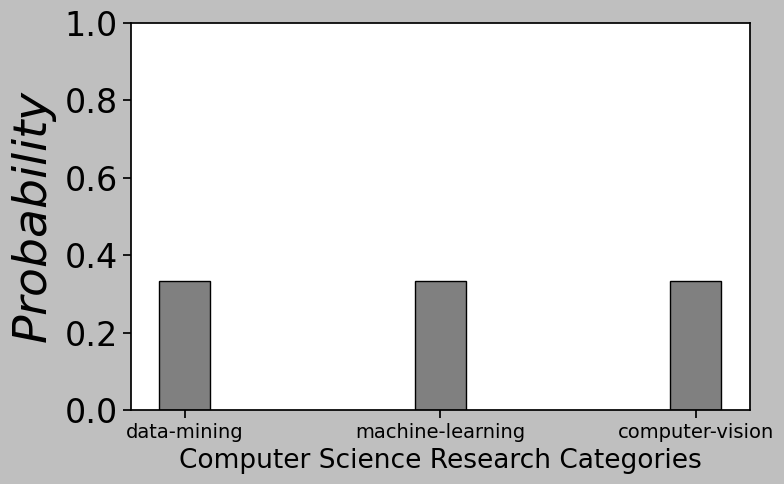

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34

data = list(labels.keys())
selected_data = [data[0], data[2], data[11]]

selected_preds_prob = [preds_prob[0], preds_prob[2], preds_prob[11]]

plt.bar(selected_data, selected_preds_prob, color='grey', width=0.2)
plt.xticks(fontsize=fontsize-20)
plt.yticks(fontsize=fontsize-10)
plt.xlabel('Computer Science Research Categories', fontsize=fontsize-15)
plt.ylabel('$Probability$',fontsize=fontsize)

plt.ylim(0,1)
plt.savefig('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/final_bar.png')
plt.show()

In [ ]:
author_Label_History_listed = list(author_Label_History.keys())

NameError: ignored

In [ ]:
final_results_real_labels = []
for i in range(10):
    loaded_file = torch.load("/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/output_possible_world"+str(i)+".pt")
    preds = loaded_file['labels:']
    ref = np.zeros_like(preds[0][0].tolist())
    for j in range(len(preds)):
        for k in range(len(preds[j])):
            ref = list(map(add, preds[j][k].tolist(), ref))
    final_results_real_labels.append(ref)

In [ ]:
print(len(final_results_real_labels))
print(final_results_real_labels)

10
[[2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989], [2813, 4235, 7379, 410, 1316, 746, 614, 821, 1192, 1316, 658, 4427, 474, 989]]


In [ ]:
r = np.zeros_like(final_results_real_labels[0])
for lis in final_results_real_labels:
    r = list(map(add, lis, r))
print(r)
labels_prob = [x/sum(r) for x in r]
print(labels_prob)

[28130, 42350, 73790, 4100, 13160, 7460, 6140, 8210, 11920, 13160, 6580, 44270, 4740, 9890]
[0.102701715954728, 0.15461847389558234, 0.2694048922964586, 0.014968966776195691, 0.04804673238408178, 0.02723621759766338, 0.022416940489229646, 0.029974443227455277, 0.043519532676159184, 0.04804673238408178, 0.02402336619204089, 0.16162833150784958, 0.017305585980284775, 0.03610806863818912]


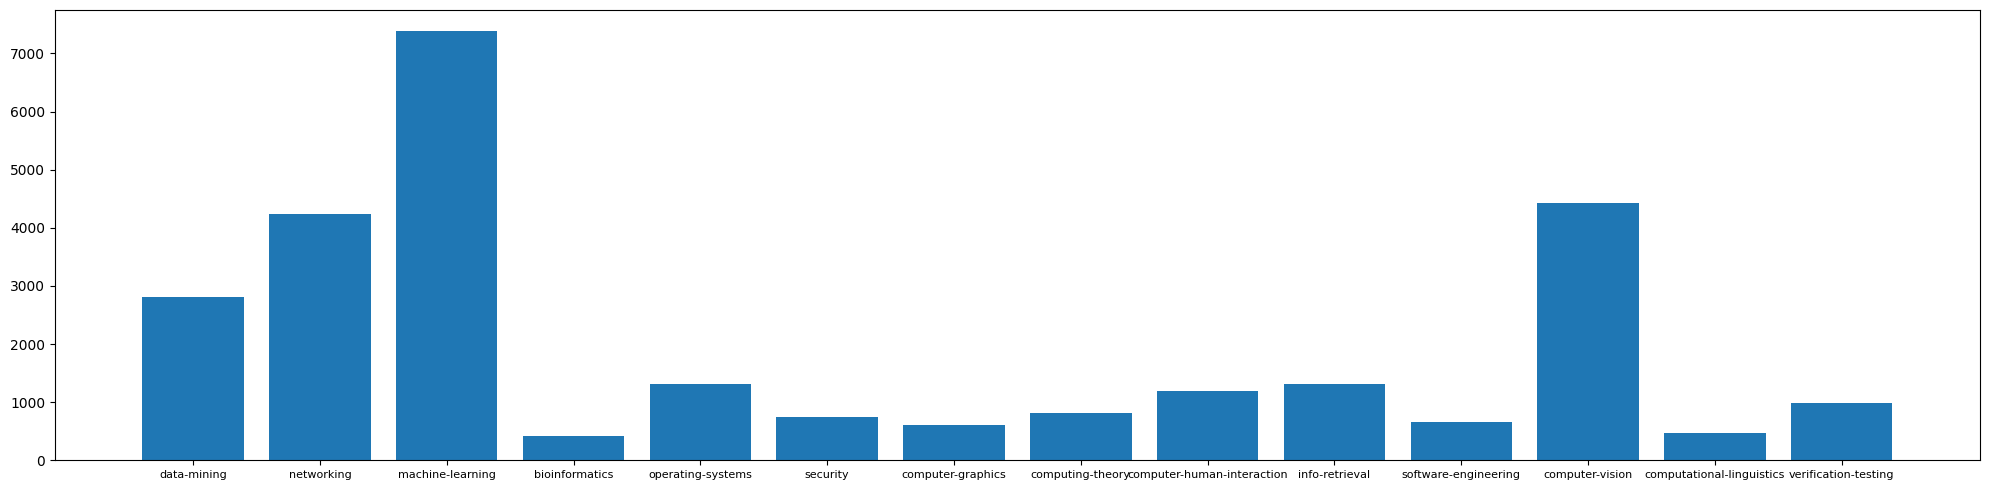

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True

# List of data points
data = labels.keys()

# Plot bar chart with data points
plt.bar(data, final_results_real_labels[0])
plt.xticks(fontsize=8)
# Display the plot
plt.show()

In [ ]:
loaded_file = torch.load("/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/output_possible_world"+str(0)+".pt")
print(loaded_file['preds'][0].size())
print(loaded_file['labels:'][0].size())
print(len(loaded_file['labels:']))
print(loaded_file['preds'][0])

torch.Size([76, 14])
torch.Size([76, 14])
386
tensor([[1., 0., 1.,  ..., 1., 0., 0.],
        [1., 0., 1.,  ..., 1., 0., 0.],
        [1., 0., 1.,  ..., 1., 0., 0.],
        ...,
        [1., 0., 1.,  ..., 1., 0., 0.],
        [1., 0., 1.,  ..., 1., 0., 0.],
        [1., 0., 1.,  ..., 1., 0., 0.]], requires_grad=True)


In [ ]:
index = 64
final_results_preds_specificly = []
for i in range(10):
    loaded_file = torch.load("/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/output_possible_world"+str(i)+".pt")
    preds = loaded_file['preds']

    final_results_preds_specificly.append(preds[0][index].tolist())

In [ ]:
print(final_results_preds_specificly)

[[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]


In [ ]:
labels_file = open('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/authorID_2_Name_file.txt', 'r')

#print(labels)
#next(data_adjlist_file)
#next(data_adjlist_file)
#next(data_adjlist_file)
labels_file = labels_file.read()
#print(labels)
label_list = []
labels_lines = labels_file.split("\n")
labels_lines = labels_lines[:-1]

for i, line in enumerate(labels_lines):
    temp = list(line.split(" "))
    if i == index:
        break
print(temp)

['65', "b'Burnsup", "Kim'"]


In [ ]:
name_2_id = open('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/authorname_2_ID_file.txt', 'r')
name_2_id = ast.literal_eval(name_2_id.read())
print(name_2_id["Xin Luna Dong"])

SyntaxError: ignored